# Linear Regression with sklearn

### Import Python libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

from sklearn.linear_model import LinearRegression

### Import data 

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create regression 

In [4]:
y = data['GPA']
x = data['SAT']

In [5]:
reg = LinearRegression()

In [6]:
# reshape input to a 2D array, only need to do this when there's one feature
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [7]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# copy_X: copy the input before fitting them
# fit_intercept: add a constant 
# n_jobs: number of CPU to use
# normalize: subtract the mean and then divide by the L-2 norm of the inputs

### R_squared 

In [9]:
reg.score(x_matrix, y)

0.40600391479679765

### Coefficients 

In [10]:
reg.coef_

array([0.00165569])

### Intercept

In [11]:
reg.intercept_

0.2750402996602803

### Visualize regression

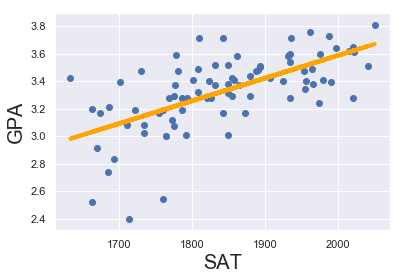

In [12]:
plt.scatter(x, y)
y_est = reg.intercept_ + reg.coef_ * x
plt.plot(x, y_est, lw=4, c='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

### Make prediction 

In [13]:
# predict y with x as input
new_data = pd.DataFrame(data=[1700,1650],columns=['SAT'])
reg.predict(new_data)

array([3.08970998, 3.00692558])

# Multivariate Linear Regression

In [14]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [15]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [16]:
y = data['GPA']
x = data[['SAT','Rand 1,2,3']]

In [17]:
reg2 = LinearRegression()
reg2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
reg2.coef_

array([ 0.00165354, -0.00826982])

In [19]:
reg2.intercept_

0.29603261264909486

### Formula for adjusted R^2

$R^2_{adj} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [20]:
# R squared
r2 = reg2.score(x,y)
# n is number of records, p is number of inputs
n,p = x.shape
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print({'R^2':r2, 'Adjusted R2':adj_r2})

{'R^2': 0.4066811952814285, 'Adjusted R2': 0.39203134825134023}


# Feature Selection

Regression on the significance of each feature

In [21]:
from sklearn.feature_selection import f_regression

In [22]:
f_regression(x,y) # F regression does not take into account the interrelation of features

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [23]:
p_value = f_regression(x,y)[1]
p_value.round(3)

array([0.   , 0.676])

### Create summary table 

In [24]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg2.coef_
reg_summary['P values'] = p_value
reg_summary

,Features,Coefficients,P values
0,SAT,0.001654,7.199518e-11
1,"Rand 1,2,3",-0.008270,6.762914e-01


# Feature Scaling

Standardize feature to have zero mean and std of 1

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar = StandardScaler()

In [30]:
scalar.fit(x) # this method will compute mean and std deviation for each feature

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
x_scaled = scalar.transform(x) # transform original data using scalar object (with mean and std)
x_scaled[:5]

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087]])

### Regression with scaled features 

In [39]:
reg3 = LinearRegression()
reg3.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
reg3_summary = pd.DataFrame(data=['Bias','SAT','Rand 1,2,3'], columns=['Features'])
reg3_summary['Weights'] = [reg3.intercept_, reg3.coef_[0], reg3.coef_[1]]
reg3_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


Note: the closer a weight is to 0, the smaller its impact, so p value is not that important in this case

### Prediction with standardized weights 

In [48]:
new_data = pd.DataFrame(data=[[1700,1],[1600,2]], columns=['SAT','Rand 1,2,3'])

new_data

,SAT,"Rand 1,2,3"
0,1700,1
1,1600,2


In [49]:
new_data_scaled = scalar.transform(new_data)

In [50]:
reg3.predict(new_data_scaled)

array([3.09878385, 2.92515985])

# Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

### Split data set into trainning data and teste data 

In [100]:
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=42) 

In [101]:
reg4 = LinearRegression()
x_train = train['SAT'].values.reshape(-1,1)
y_train = train['GPA']
reg4.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making predictions on test data

In [102]:
x_test = test['SAT'].values.reshape(-1,1)
y_test = test['GPA']
y_predict = reg4.predict(x_test)

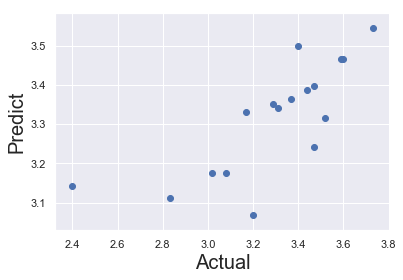

In [103]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predict', fontsize=20)
plt.show()